In [10]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
from sklearn import metrics
import numpy as mp

# ●	Load the data using Python Pandas library.

In [11]:
df=pd.read_csv('mtcars.csv')

In [12]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# ●	Do Exploratory Data Analysis of the data and state your insights.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [14]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


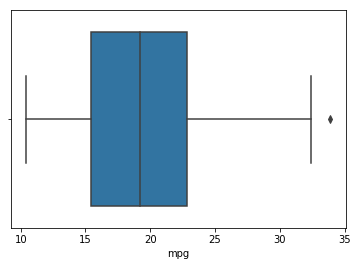

In [15]:
sns.boxplot(df['mpg'])

In [16]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [17]:
Q1=15.425
Q3=22.80
IQR=Q3-Q1
Upper_limit=Q3+1.5*IQR
Lower_limit=Q1-1.5*IQR

In [18]:
df2=df[(df['mpg']>=Lower_limit)&
      (df['mpg']<=Upper_limit)]

In [19]:
df2.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,19.645161,6.258065,235.870968,149.322581,3.576452,3.261839,17.782581,0.419355,0.387097,3.677419,2.870968
std,5.565359,1.769515,122.458666,68.029105,0.531072,0.961015,1.776183,0.501610,0.495138,0.747757,1.607108
min,10.400000,4.000000,75.700000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.000000
25%,15.350000,4.000000,130.900000,101.000000,3.080000,2.695000,16.885000,0.000000,0.000000,3.000000,2.000000
50%,19.200000,6.000000,225.000000,123.000000,3.690000,3.435000,17.600000,0.000000,0.000000,4.000000,2.000000
75%,22.150000,8.000000,334.000000,180.000000,3.920000,3.650000,18.755000,1.000000,1.000000,4.000000,4.000000
max,32.400000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.000000


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 31
Data columns (total 12 columns):
model    31 non-null object
mpg      31 non-null float64
cyl      31 non-null int64
disp     31 non-null float64
hp       31 non-null int64
drat     31 non-null float64
wt       31 non-null float64
qsec     31 non-null float64
vs       31 non-null int64
am       31 non-null int64
gear     31 non-null int64
carb     31 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


# ●	Check whether the dataset satisfy all the regression assumptions 

In [5]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
df['model'].unique

<bound method Series.unique of 0               Mazda RX4
1           Mazda RX4 Wag
2              Datsun 710
3          Hornet 4 Drive
4       Hornet Sportabout
5                 Valiant
6              Duster 360
7               Merc 240D
8                Merc 230
9                Merc 280
10              Merc 280C
11             Merc 450SE
12             Merc 450SL
13            Merc 450SLC
14     Cadillac Fleetwood
15    Lincoln Continental
16      Chrysler Imperial
17               Fiat 128
18            Honda Civic
19         Toyota Corolla
20          Toyota Corona
21       Dodge Challenger
22            AMC Javelin
23             Camaro Z28
24       Pontiac Firebird
25              Fiat X1-9
26          Porsche 914-2
27           Lotus Europa
28         Ford Pantera L
29           Ferrari Dino
30          Maserati Bora
31             Volvo 142E
Name: model, dtype: object>

In [29]:
X=df2.drop(columns={'mpg','model'})

In [30]:
Y=df2['mpg']

In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

print('Coefficients:', lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)
print('R^2 score:' ,lin_reg.score(X, Y))

('Coefficients:', array([-0.45379806,  0.01162834, -0.02376399,  0.48442622, -3.16727384,
        0.36507047,  0.41043703,  1.43937449,  0.87856859, -0.22174632]))
('Intercept:', 22.073950340322575)
('R^2 score:', 0.8682742492846425)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(21, 10)
(10, 10)
(10,)


In [33]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print('R^2 score for train:', lin_reg.score(X_train, y_train))
print('R^2 score for test: ',lin_reg.score(X_test, y_test))

('R^2 score for train:', 0.9146085297275265)
('R^2 score for test: ', -0.3960458639734872)


In [34]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(Y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     13.18
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           9.46e-07
Time:                        15:05:18   Log-Likelihood:                -65.273
No. Observations:                  31   AIC:                             152.5
Df Residuals:                      20   BIC:                             168.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0740     18.126      1.218      0.237     -15.737      59.885
cyl           -0.4538      0.990     -0.458      0.652      -2.519       1.611
disp           0.0116      0.017      0.697      0.494      -0.023       0.046
hp            -0.0238      0.020     -1.168      0.257      -0.066       0.019
drat           0.4844      1.534      0.316      0.755      -2.715       3.684
wt            -3.1673      1.789     -1.770      0.092      -6.899       0.564
qsec           0.3651      0.718      0.508      0.617      -1.134       1.864
vs             0.4104      1.965      0.209      0.837      -3.688       4.509
am             1.4394      1.993      0.722      0.478      -2.717       5.596
gear           0.8786      1.398      0.628      0.537      -2.038       3.795
carb          -0.2217      0.774     -0.287      0.777      -1.836       1.392
==============================================================================
Omnibus:                        4.115   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                2.974
Skew:                           0.750   Prob(JB):                        0.226
Kurtosis:                       3.233   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#by cheking with normal distribution of target check adjusted R2
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
y=np.log(Y)
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     14.99
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           3.25e-07
Time:                        15:05:20   Log-Likelihood:                 28.718
No. Observations:                  31   AIC:                            -35.44
Df Residuals:                      20   BIC:                            -19.66
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0445      0.874      3.483      0.002       1.221       4.868
cyl           -0.0018      0.048     -0.037      0.971      -0.101       0.098
disp        2.912e-06      0.001      0.004      0.997      -0.002       0.002
hp            -0.0010      0.001     -0.977      0.340      -0.003       0.001
drat           0.0139      0.074      0.188      0.853      -0.140       0.168
wt            -0.1572      0.086     -1.823      0.083      -0.337       0.023
qsec           0.0182      0.035      0.526      0.605      -0.054       0.090
vs            -0.0003      0.095     -0.003      0.997      -0.198       0.197
am             0.0176      0.096      0.183      0.856      -0.183       0.218
gear           0.0654      0.067      0.970      0.344      -0.075       0.206
carb          -0.0207      0.037     -0.556      0.585      -0.099       0.057
==============================================================================
Omnibus:                        2.754   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                2.180
Skew:                           0.646   Prob(JB):                        0.336
Kurtosis:                       2.867   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Assumption 1- No autocorrelation

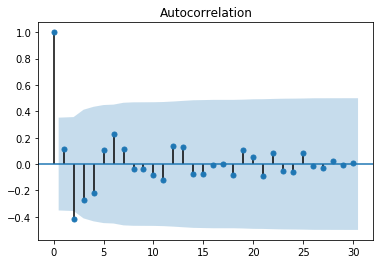

In [37]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=30, alpha=0.05)
acf.show()

In [38]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(2.180482886341043, 0.3361353263295599)


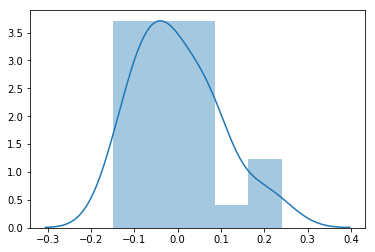

In [39]:
import seaborn as sns

sns.distplot(lin_reg.resid)

# Asssumption 3 - Linearity of residuals¶

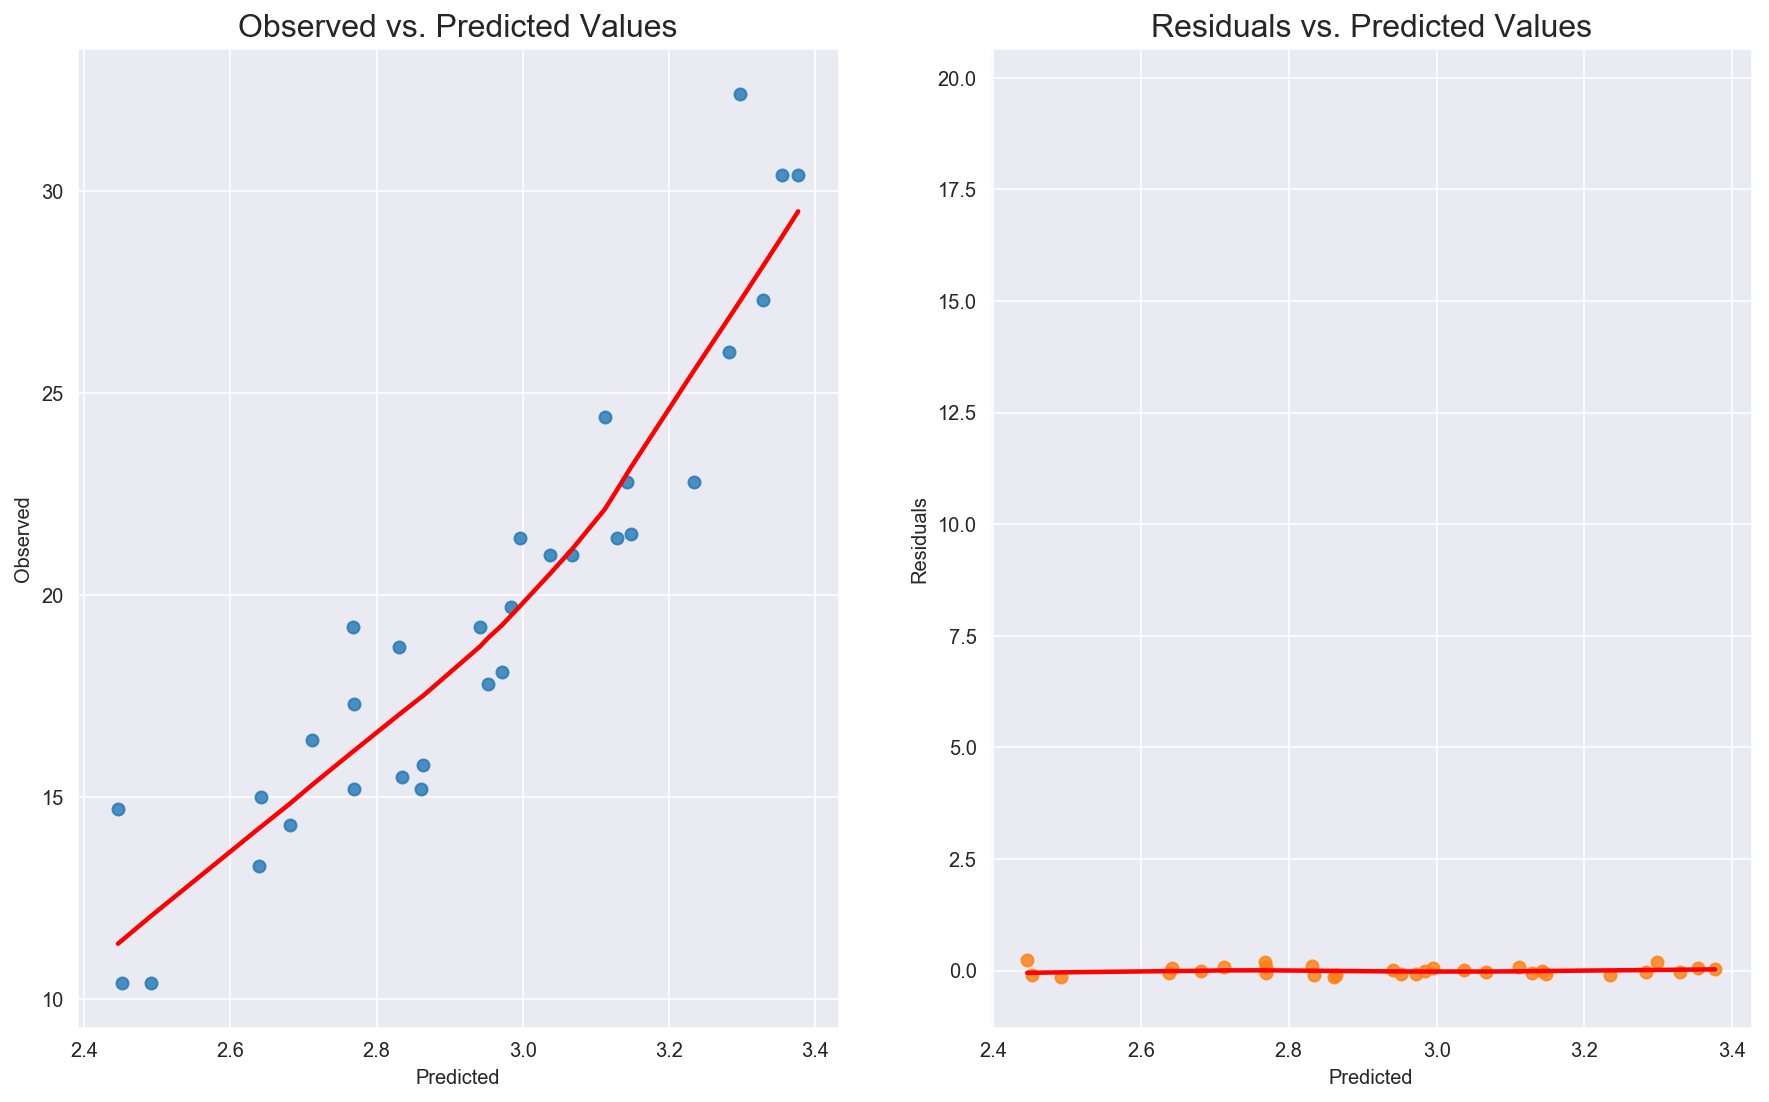

In [40]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, Y)  

# Rainbow test

In [41]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(1.1728188330368838, 0.4872745001556872)

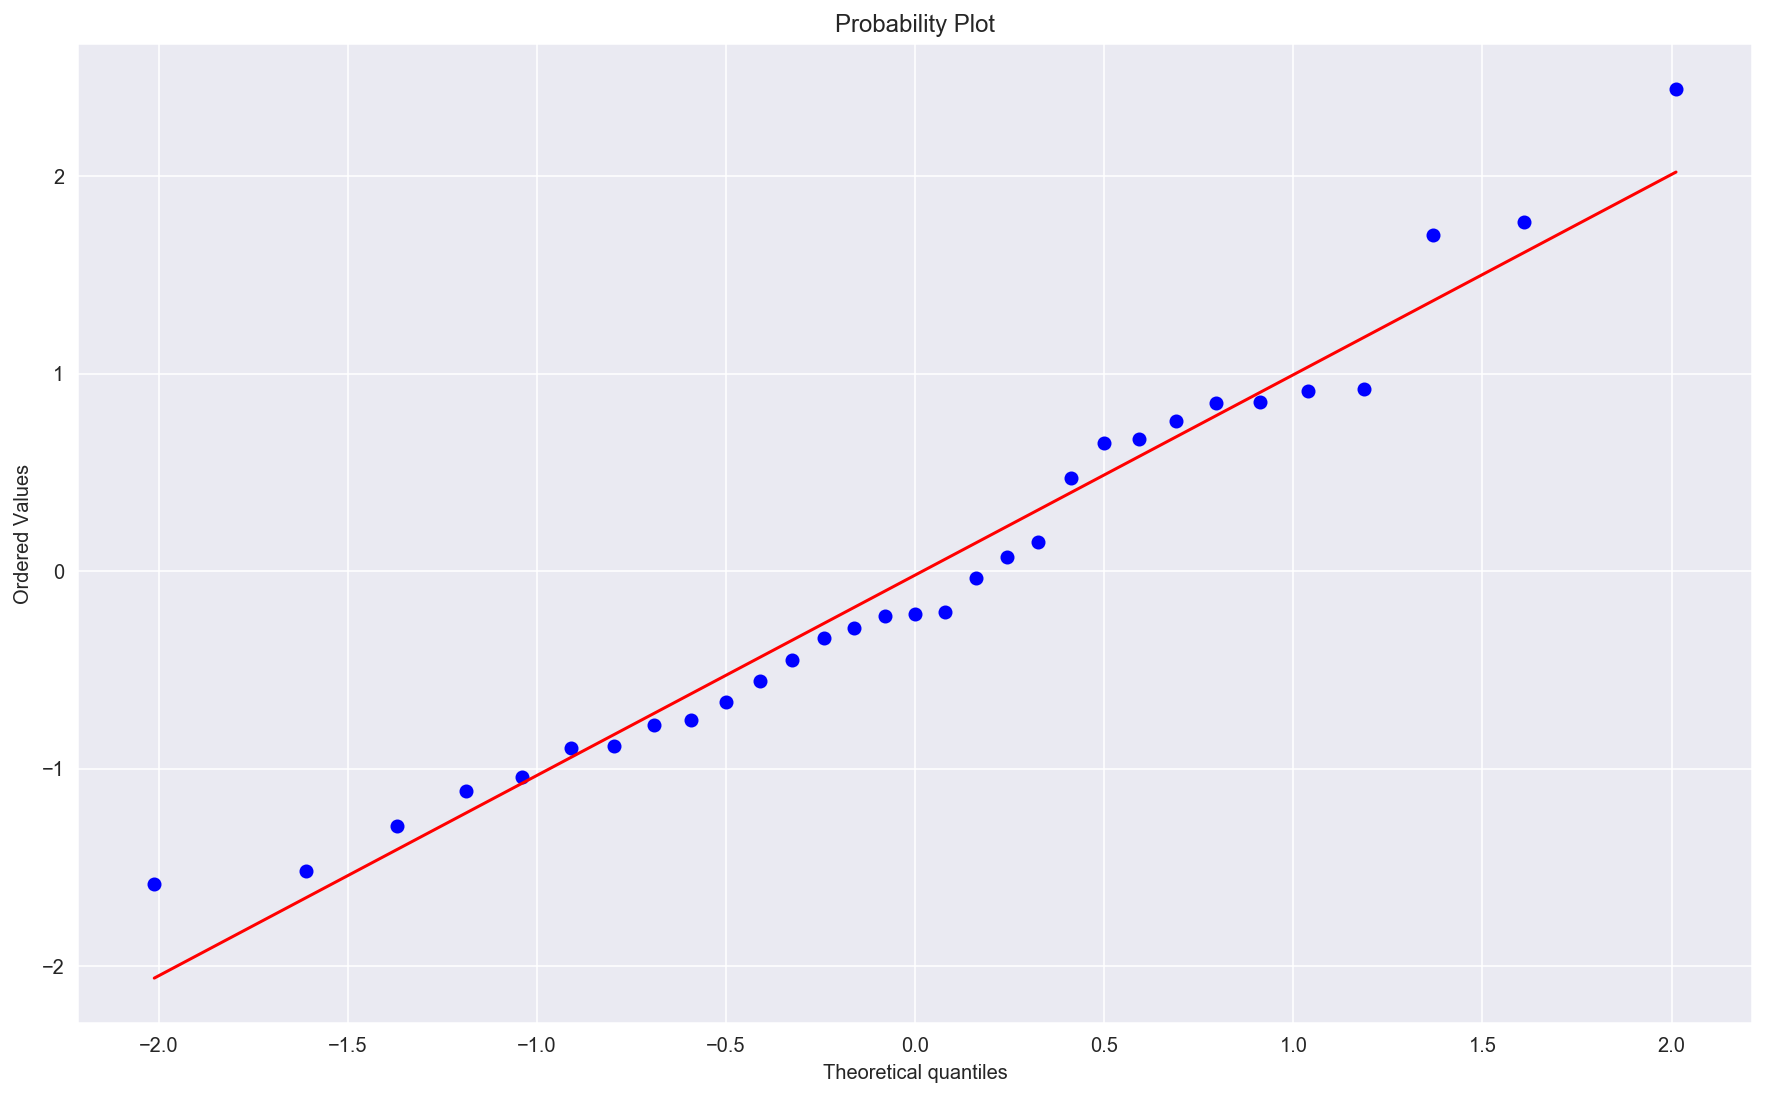

In [42]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [43]:
lin_reg.resid.mean()

3.0785410063476924e-14

##### Assumption 4 -  Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)
Homoscedacity :: If the residuals are symmetrically distributed across the trend , then it is called as homoscedacious.
Heteroscedacity :: If the residuals are not symmetric across the trend, then it is called as heteroscedacious. In this the residuals can form an arrow shape or any other non symmetrical shape.

This test is based on the hytpothesis testing where null and alternate hypothesis are:
H0 = constant variance among residuals. (Homoscedacity)
Ha = Heteroscedacity.

The residuals should be homoscedacious.

# Goldfeld Test

[('F statistic', 13.198660661531685), ('p-value', 0.007228892597072398)]

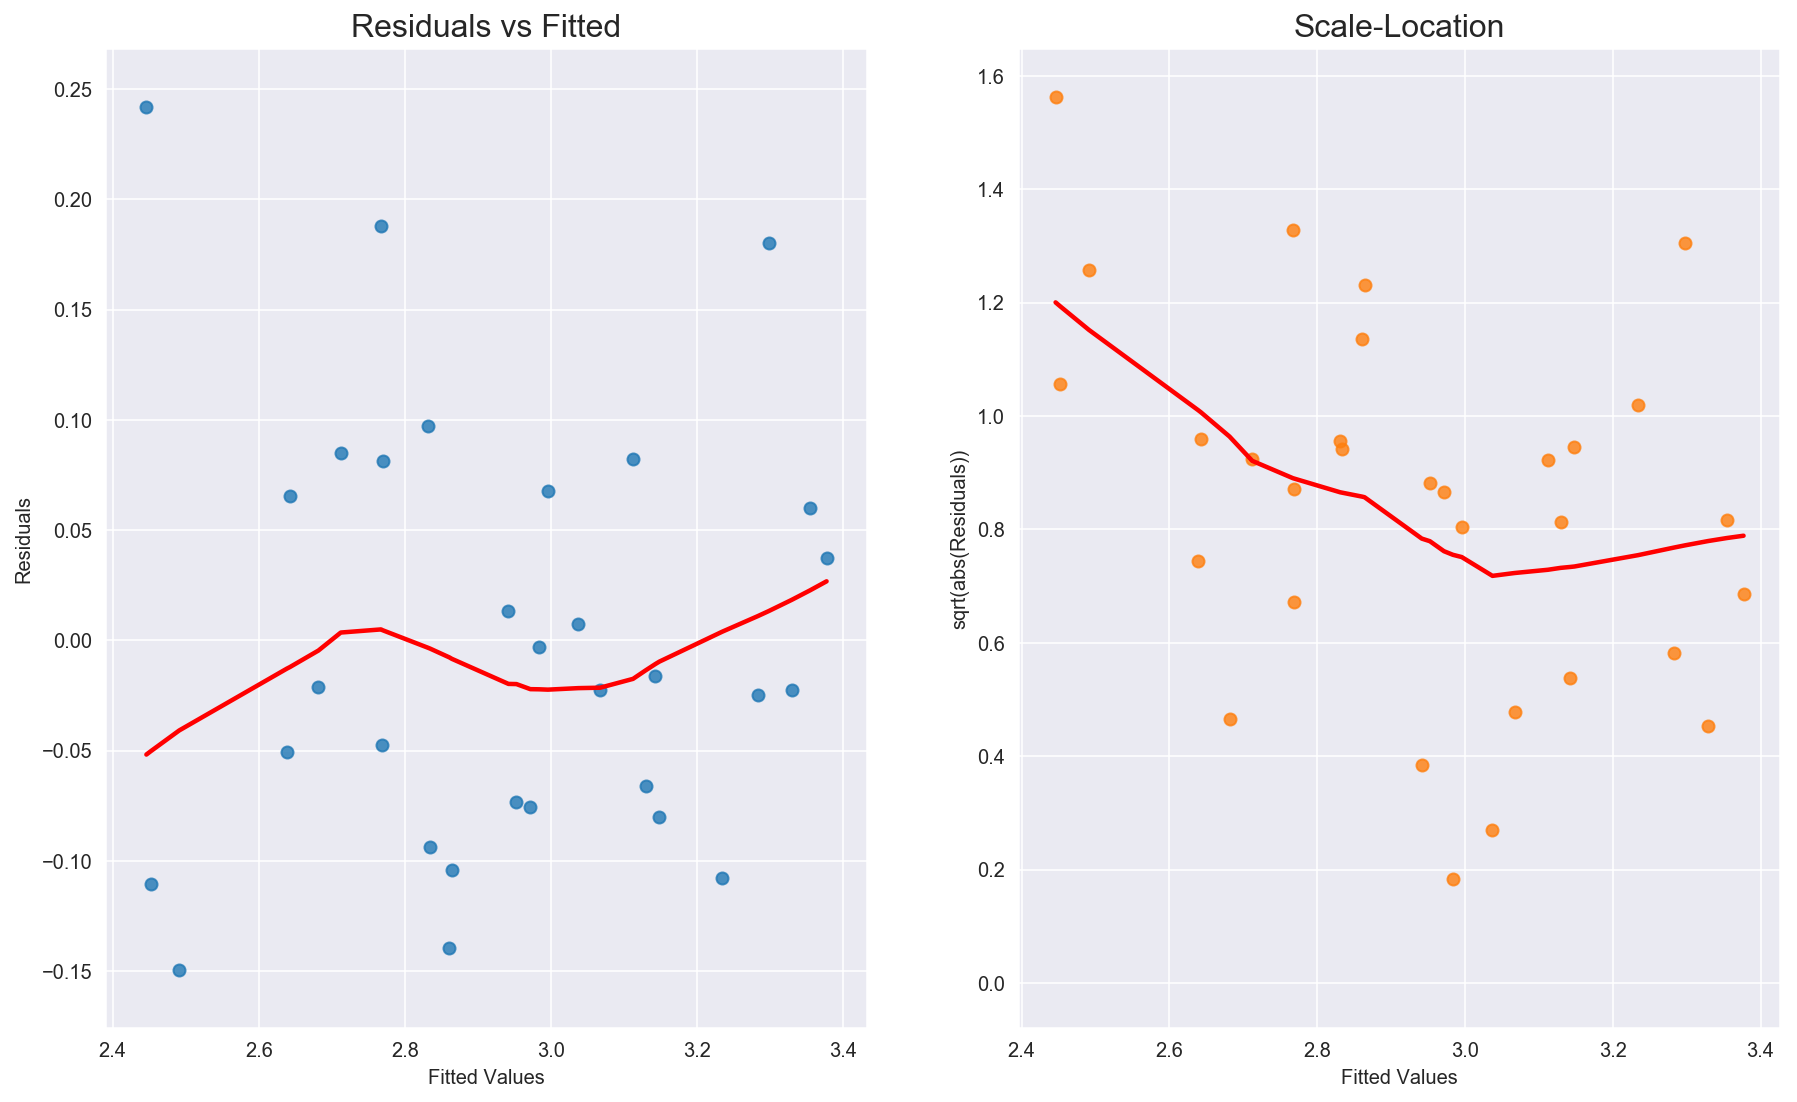

In [44]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

# Assumption 5- NO MULTI COLLINEARITY¶

The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is,
compared with what it would be if that predictor were uncorrelated with the other features in the model.
If no features are correlated, then all values for VIF will be 1.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
vif,15.04453,20.478324,9.396111,3.252735,14.488719,7.981761,4.762499,4.771712,5.358734,7.578668


In [47]:
#vif>4 so remove max remove cyl first

In [48]:
X.drop(columns={'cyl'},inplace=True)

In [49]:
y=np.log(Y)
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     17.49
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           7.41e-08
Time:                        15:19:02   Log-Likelihood:                 28.716
No. Observations:                  31   AIC:                            -37.43
Df Residuals:                      21   BIC:                            -23.09
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0224      0.622      4.861      0.000       1.729       4.315
disp       -4.626e-06      0.001     -0.006      0.995      -0.002       0.002
hp            -0.0010      0.001     -1.023      0.318      -0.003       0.001
drat           0.0147      0.069      0.212      0.834      -0.129       0.158
wt            -0.1570      0.084     -1.871      0.075      -0.331       0.017
qsec           0.0186      0.032      0.579      0.569      -0.048       0.085
vs             0.0008      0.088      0.009      0.993      -0.182       0.183
am             0.0187      0.090      0.208      0.837      -0.168       0.205
gear           0.0662      0.062      1.067      0.298      -0.063       0.195
carb          -0.0210      0.035     -0.593      0.560      -0.095       0.053
==============================================================================
Omnibus:                        2.764   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.180
Skew:                           0.647   Prob(JB):                        0.336
Kurtosis:                       2.875   Cond. No.                     9.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,disp,hp,drat,wt,qsec,vs,am,gear,carb
vif,19.164509,9.120099,2.984762,14.38632,7.212498,4.298928,4.361135,4.765081,7.203987


In [51]:
X.drop(columns={'disp'},inplace=True)

In [52]:
y=np.log(Y)
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     20.61
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           1.55e-08
Time:                        15:19:35   Log-Likelihood:                 28.716
No. Observations:                  31   AIC:                            -39.43
Df Residuals:                      22   BIC:                            -26.53
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0213      0.582      5.195      0.000       1.815       4.227
hp            -0.0010      0.001     -1.304      0.206      -0.003       0.001
drat           0.0146      0.068      0.217      0.830      -0.125       0.155
wt            -0.1574      0.052     -3.031      0.006      -0.265      -0.050
qsec           0.0187      0.029      0.649      0.523      -0.041       0.078
vs             0.0009      0.084      0.010      0.992      -0.174       0.176
am             0.0187      0.087      0.216      0.831      -0.162       0.199
gear           0.0662      0.061      1.092      0.286      -0.060       0.192
carb          -0.0209      0.026     -0.798      0.434      -0.075       0.033
==============================================================================
Omnibus:                        2.763   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.177
Skew:                           0.646   Prob(JB):                        0.337
Kurtosis:                       2.876   Cond. No.                     4.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,hp,drat,wt,qsec,vs,am,gear,carb
vif,5.926132,2.979856,5.773566,6.074889,4.13795,4.295139,4.765055,4.111306


In [54]:
X.drop(columns={'qsec'},inplace=True)

In [55]:
y=np.log(Y)
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     24.11
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           3.67e-09
Time:                        15:20:09   Log-Likelihood:                 28.423
No. Observations:                  31   AIC:                            -40.85
Df Residuals:                      23   BIC:                            -29.37
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3293      0.332     10.043      0.000       2.644       4.015
hp            -0.0012      0.001     -2.058      0.051      -0.002    6.72e-06
drat           0.0151      0.067      0.227      0.822      -0.123       0.153
wt            -0.1416      0.045     -3.127      0.005      -0.235      -0.048
vs             0.0358      0.064      0.561      0.580      -0.096       0.168
am             0.0052      0.083      0.062      0.951      -0.167       0.177
gear           0.0687      0.060      1.150      0.262      -0.055       0.192
carb          -0.0232      0.026     -0.906      0.375      -0.076       0.030
==============================================================================
Omnibus:                        2.227   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.839
Skew:                           0.584   Prob(JB):                        0.399
Kurtosis:                       2.757   Cond. No.                     2.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,hp,drat,wt,vs,am,gear,carb
vif,4.01495,2.979466,4.502515,2.444241,4.046561,4.745852,4.035222


In [57]:
X.drop(columns={'wt'},inplace=True)

In [58]:
y=np.log(Y)
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     19.40
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           4.02e-08
Time:                        15:20:45   Log-Likelihood:                 22.932
No. Observations:                  31   AIC:                            -31.86
Df Residuals:                      24   BIC:                            -21.83
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6434      0.290      9.100      0.000       2.044       3.243
hp            -0.0016      0.001     -2.341      0.028      -0.003      -0.000
drat           0.0517      0.077      0.674      0.506      -0.107       0.210
vs             0.0489      0.075      0.657      0.518      -0.105       0.203
am             0.0980      0.091      1.077      0.292      -0.090       0.286
gear           0.1209      0.067      1.804      0.084      -0.017       0.259
carb          -0.0524      0.028     -1.879      0.072      -0.110       0.005
==============================================================================
Omnibus:                        2.482   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.027
Skew:                          -0.617   Prob(JB):                        0.363
Kurtosis:                       2.790   Cond. No.                     2.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,hp,drat,vs,am,gear,carb
vif,3.855501,2.887713,2.433721,3.53269,4.375214,3.499229


In [60]:
X.drop(columns={'gear'},inplace=True)

In [61]:
y=np.log(Y)
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     20.76
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           3.60e-08
Time:                        15:21:10   Log-Likelihood:                 20.961
No. Observations:                  31   AIC:                            -29.92
Df Residuals:                      25   BIC:                            -21.32
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8453      0.280     10.166      0.000       2.269       3.422
hp            -0.0017      0.001     -2.322      0.029      -0.003      -0.000
drat           0.0878      0.077      1.136      0.267      -0.071       0.247
vs             0.0893      0.074      1.203      0.240      -0.064       0.242
am             0.2020      0.073      2.751      0.011       0.051       0.353
carb          -0.0298      0.026     -1.146      0.262      -0.083       0.024
==============================================================================
Omnibus:                        2.746   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                1.939
Skew:                          -0.612   Prob(JB):                        0.379
Kurtosis:                       3.058   Cond. No.                     1.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,hp,drat,vs,am,carb
vif,3.847611,2.690866,2.214443,2.112291,2.794332


# ●	Build Multiple Linear Regression model.